In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('usedCars.csv')
df.head()

Id        Company               Model           Variant FuelType  \
0  555675  MARUTI SUZUKI  CELERIO(2017-2019)     1.0 ZXI AMT O   PETROL   
1  556383  MARUTI SUZUKI                ALTO               LXI   PETROL   
2  556422        HYUNDAI           GRAND I10    1.2 KAPPA ASTA   PETROL   
3  556771           TATA               NEXON           XT PLUS   PETROL   
4  559619           FORD                FIGO  EXI DURATORQ 1.4   DIESEL   

   Colour  Kilometer  BodyStyle TransmissionType ManufactureDate  ModelYear  \
0  Silver      33197  HATCHBACK              NaN      2018-02-01       2018   
1     Red      10322  HATCHBACK           Manual      2021-03-01       2021   
2    Grey      37889  HATCHBACK           Manual      2015-03-01       2015   
3  A Blue      13106  HATCHBACK              NaN      2020-08-01       2020   
4  Silver     104614  HATCHBACK           Manual      2010-11-01       2010   

  CngKit       Price      Owner DealerState                      DealerName  \
0    NaN  5.75 Lakhs  1st Owner   Karnataka                   Top Gear Cars   
1    NaN  4.35 Lakhs  1st Owner   Karnataka  Renew 4 u Automobiles PVT Ltd    
2    NaN   4.7 Lakhs  1st Owner   Karnataka         Anant Cars Auto Pvt Ltd   
3    NaN   9.9 Lakhs  1st Owner   Karnataka                    Adeep Motors   
4    NaN   2.7 Lakhs  2nd Owner   Karnataka                  Zippy Automart   

        City  Warranty  QualityScore  
0  Bangalore         1           7.8  
1  Bangalore         1           8.3  
2  Bangalore         1           7.9  
3  Bangalore         1           8.1  
4  Bangalore         0           7.5

In [3]:
df.shape

(1064, 19)

In [4]:
df.columns

Index(['Id', 'Company', 'Model', 'Variant', 'FuelType', 'Colour', 'Kilometer',
       'BodyStyle', 'TransmissionType', 'ManufactureDate', 'ModelYear',
       'CngKit', 'Price', 'Owner', 'DealerState', 'DealerName', 'City',
       'Warranty', 'QualityScore'],
      dtype='object')

In [6]:
df.drop('Id', axis=1,inplace=True)

In [7]:
df.dtypes


Company              object
Model                object
Variant              object
FuelType             object
Colour               object
Kilometer             int64
BodyStyle            object
TransmissionType     object
ManufactureDate      object
ModelYear             int64
CngKit               object
Price                object
Owner                object
DealerState          object
DealerName           object
City                 object
Warranty              int64
QualityScore        float64
dtype: object

In [36]:
def convert_amount(amount_str):
    if "Lakhs" in amount_str:
        return float(amount_str.replace("Lakhs", '').replace(',', '')) * 100000
    else:
        return float(amount_str.replace(',', ''))

df['Price'] = df['Price'].apply(convert_amount)

TypeError: argument of type 'float' is not iterable

In [33]:
print(df[['Price']].head())


        Price
0  5.75 Lakhs
1  4.35 Lakhs
2   4.7 Lakhs
3   9.9 Lakhs
4   2.7 Lakhs


In [30]:
df.isnull().sum()/df.shape[0]*100

Id                   0.000000
Company              0.000000
Model                0.000000
Variant              0.000000
FuelType             0.093985
Colour               0.000000
Kilometer            0.000000
BodyStyle            0.000000
TransmissionType    67.105263
ManufactureDate      0.000000
ModelYear            0.000000
CngKit              97.932331
Price                0.000000
Owner                0.000000
DealerState          0.000000
DealerName           0.000000
City                 0.000000
Warranty             0.000000
QualityScore         0.000000
dtype: float64

In [10]:
df.drop('CngKit', axis=1, inplace=True)

In [37]:
df.drop('TransmissionType',axis=1,inplace=True)

In [38]:
df['FuelType'].dropna(inplace=True)

In [39]:
df.drop('ManufactureDate', axis=1, inplace=True)

In [40]:
df.drop('Variant', axis=1, inplace=True)

In [41]:
df['ModelYear']=2023-df['ModelYear']
df.rename(columns={'ModelYear':'Age'}, inplace=True)

In [18]:
for i in df.columns:
    print(i,df[i].nunique())

Id 1064
Company 23
Model 218
FuelType 5
Colour 76
Kilometer 1006
BodyStyle 10
TransmissionType 9
Age 17
Price 367
Owner 4
DealerState 10
DealerName 57
City 11
Warranty 2
QualityScore 43


In [19]:
df.describe()

Id      Kilometer          Age     Warranty  QualityScore
count    1064.000000    1064.000000  1064.000000  1064.000000   1064.000000
mean   568156.542293   52807.187970     6.135338     0.738722      7.770207
std     16438.139974   33840.296979     2.996786     0.439538      0.719717
min    525978.000000     101.000000     0.000000     0.000000      0.000000
25%    555321.500000   32113.500000     4.000000     0.000000      7.500000
50%    572753.000000   49432.000000     6.000000     1.000000      7.800000
75%    583072.750000   68828.500000     8.000000     1.000000      8.100000
max    589122.000000  640000.000000    20.000000     1.000000      9.400000

In [20]:
df.head()

Id        Company               Model FuelType  Colour  Kilometer  \
0  555675  MARUTI SUZUKI  CELERIO(2017-2019)   PETROL  Silver      33197   
1  556383  MARUTI SUZUKI                ALTO   PETROL     Red      10322   
2  556422        HYUNDAI           GRAND I10   PETROL    Grey      37889   
3  556771           TATA               NEXON   PETROL  A Blue      13106   
4  559619           FORD                FIGO   DIESEL  Silver     104614   

   BodyStyle TransmissionType  Age       Price      Owner DealerState  \
0  HATCHBACK              NaN    5  5.75 Lakhs  1st Owner   Karnataka   
1  HATCHBACK           Manual    2  4.35 Lakhs  1st Owner   Karnataka   
2  HATCHBACK           Manual    8   4.7 Lakhs  1st Owner   Karnataka   
3  HATCHBACK              NaN    3   9.9 Lakhs  1st Owner   Karnataka   
4  HATCHBACK           Manual   13   2.7 Lakhs  2nd Owner   Karnataka   

                       DealerName       City  Warranty  QualityScore  
0                   Top Gear Cars  Bangalore         1           7.8  
1  Renew 4 u Automobiles PVT Ltd   Bangalore         1           8.3  
2         Anant Cars Auto Pvt Ltd  Bangalore         1           7.9  
3                    Adeep Motors  Bangalore         1           8.1  
4                  Zippy Automart  Bangalore         0           7.5

In [ ]:

In the exploratory data analysis, I will be looking at the distribution of
data across all the columns, in order to understand the data in a better way. 
After that I will be looking at the relationship between the target 
and the independent variables.

C:\Users\farne\AppData\Local\Temp\ipykernel_16548\1586379779.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['Company'],order=df['Company'].value_counts().index, palette='Set1').set_title('Number of cars by company')


Text(0.5, 1.0, 'Number of cars by company')

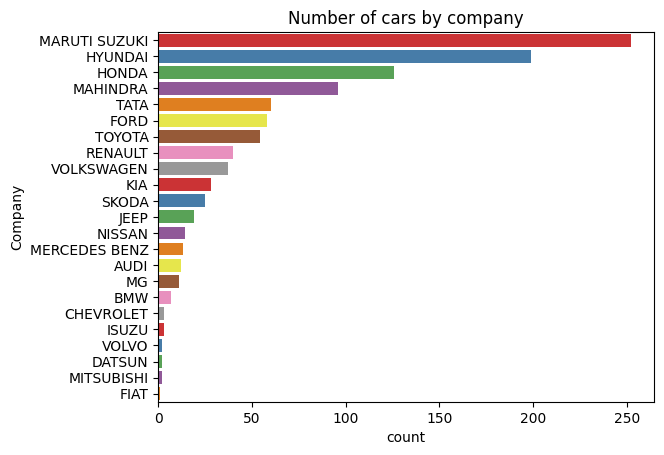

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.countplot(df['Company'],order=df['Company'].value_counts().index, palette='Set1').set_title('Number of cars by company')


In [9]:
import pandas as pd

# Load data from a CSV
df = pd.read_csv('usedCars.csv')

# Check the first few rows
print(df.head())


       Id        Company               Model           Variant FuelType  \
0  555675  MARUTI SUZUKI  CELERIO(2017-2019)     1.0 ZXI AMT O   PETROL   
1  556383  MARUTI SUZUKI                ALTO               LXI   PETROL   
2  556422        HYUNDAI           GRAND I10    1.2 KAPPA ASTA   PETROL   
3  556771           TATA               NEXON           XT PLUS   PETROL   
4  559619           FORD                FIGO  EXI DURATORQ 1.4   DIESEL   

   Colour  Kilometer  BodyStyle TransmissionType ManufactureDate  ModelYear  \
0  Silver      33197  HATCHBACK              NaN      2018-02-01       2018   
1     Red      10322  HATCHBACK           Manual      2021-03-01       2021   
2    Grey      37889  HATCHBACK           Manual      2015-03-01       2015   
3  A Blue      13106  HATCHBACK              NaN      2020-08-01       2020   
4  Silver     104614  HATCHBACK           Manual      2010-11-01       2010   

  CngKit       Price      Owner DealerState                      DealerNam

C:\Users\farne\AppData\Local\Temp\ipykernel_16548\2593554521.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['Model'],order=df['Model'].value_counts().iloc[:10].index, palette='Set1').set_title('Top 10 car Models')


Text(0.5, 1.0, 'Top 10 car Models')

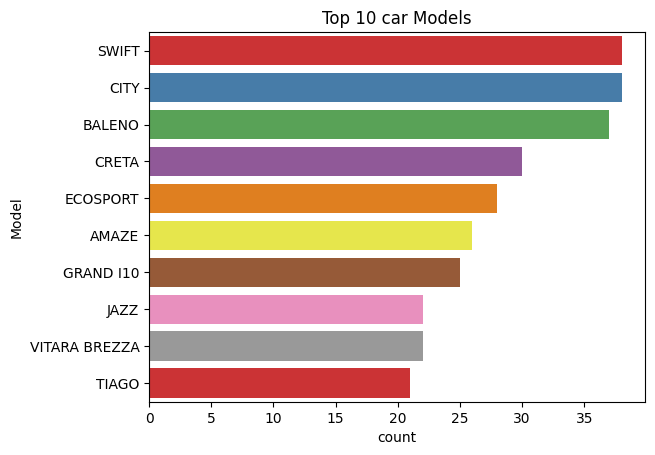

In [15]:
sns.countplot(df['Model'],order=df['Model'].value_counts().iloc[:10].index, palette='Set1').set_title('Top 10 car Models')

In [ ]:

Honda City and Swift are the top two car models in the dataset, 
followed by Baleno, Creata and EcoSport. Therefore, we can assume
that these car models are more durable and have a good resale value.
Moreover, this graph also shows that Honda City and Swift are more in
demand in the used car market.

C:\Users\farne\AppData\Local\Temp\ipykernel_16548\3424792545.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='FuelType', data=df, palette ='Set1').set_title('Number of cars by Fuel Type')


Text(0.5, 1.0, 'Number of cars by Fuel Type')

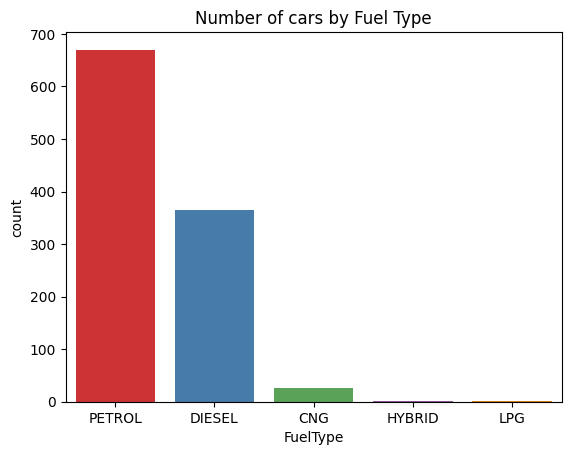

In [17]:
sns.countplot(x='FuelType', data=df, palette ='Set1').set_title('Number of cars by Fuel Type')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'White'),
  Text(1, 0, 'Silver'),
  Text(2, 0, 'Grey'),
  Text(3, 0, 'Red'),
  Text(4, 0, 'Black'),
  Text(5, 0, 'Brown'),
  Text(6, 0, 'Blue'),
  Text(7, 0, 'A Blue'),
  Text(8, 0, 'Pearl White'),
  Text(9, 0, 'Orange')])

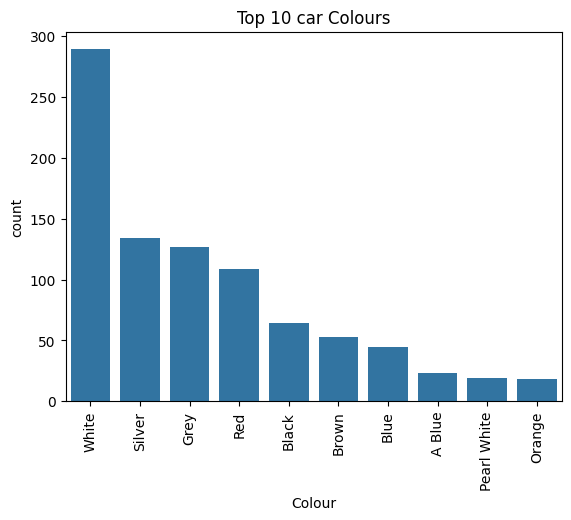

In [21]:
sns.countplot(x='Colour', data=df, order=df['Colour'].value_counts().iloc[:10].index).set_title('Top 10 car Colours')
plt.xticks(rotation=90)

In [ ]:
Odometre Reading

Text(0.5, 1.0, 'Odometer Reading')

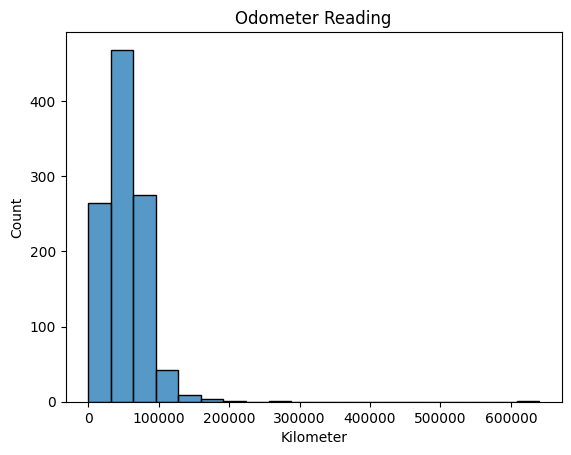

In [46]:
sns.histplot(x = 'Kilometer', data = df, bins = 20).set_title('Odometer Reading')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'HATCHBACK'),
  Text(1, 0, 'SEDAN'),
  Text(2, 0, 'MPV'),
  Text(3, 0, 'SUV'),
  Text(4, 0, 'HATCHBACK '),
  Text(5, 0, 'VAN'),
  Text(6, 0, 'MUV'),
  Text(7, 0, 'COMPACTSUV'),
  Text(8, 0, 'Sedan'),
  Text(9, 0, 'SUV ')])

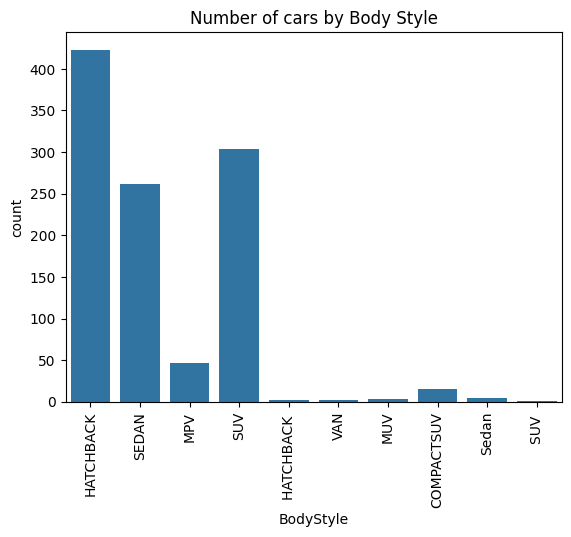

In [52]:
#Body style count
import matplotlib.pyplot as plt
sns.countplot(x = 'BodyStyle', data = df).set_title('Number of cars by Body Style')
plt.xticks(rotation = 90)

Text(0.5, 1.0, 'Car age distribution')

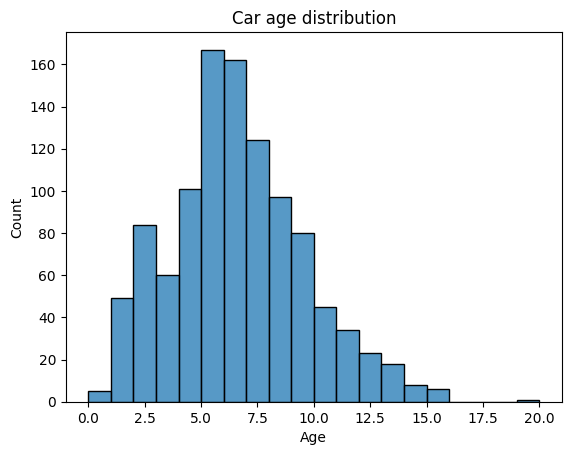

In [53]:
#car age distribution
sns.histplot(x='Age', data=df, bins=20).set_title('Car age distribution')

In [23]:
df.columns = df.columns.str.strip()  # Removes extra spaces
print(df.columns)


Index(['Id', 'Company', 'Model', 'Variant', 'FuelType', 'Colour', 'Kilometer',
       'BodyStyle', 'TransmissionType', 'ManufactureDate', 'ModelYear',
       'CngKit', 'Price', 'Owner', 'DealerState', 'DealerName', 'City',
       'Warranty', 'QualityScore'],
      dtype='object')


In [22]:
import pandas as pd 
df=pd.read_csv('usedCars.csv')
print(df.head())


       Id        Company               Model           Variant FuelType  \
0  555675  MARUTI SUZUKI  CELERIO(2017-2019)     1.0 ZXI AMT O   PETROL   
1  556383  MARUTI SUZUKI                ALTO               LXI   PETROL   
2  556422        HYUNDAI           GRAND I10    1.2 KAPPA ASTA   PETROL   
3  556771           TATA               NEXON           XT PLUS   PETROL   
4  559619           FORD                FIGO  EXI DURATORQ 1.4   DIESEL   

   Colour  Kilometer  BodyStyle TransmissionType ManufactureDate  ModelYear  \
0  Silver      33197  HATCHBACK              NaN      2018-02-01       2018   
1     Red      10322  HATCHBACK           Manual      2021-03-01       2021   
2    Grey      37889  HATCHBACK           Manual      2015-03-01       2015   
3  A Blue      13106  HATCHBACK              NaN      2020-08-01       2020   
4  Silver     104614  HATCHBACK           Manual      2010-11-01       2010   

  CngKit       Price      Owner DealerState                      DealerNam

In [15]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [48]:
pip install matplotlib 


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [50]:
 pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
  Using cached pip-25.0.1-py3-none-any.whl.metadata (3.7 kB)
Using cached pip-25.0.1-py3-none-any.whl (1.8 MB)
Note: you may need to restart the kernel to use updated packages.


Text(0.5, 1.0, 'Car price distribution')

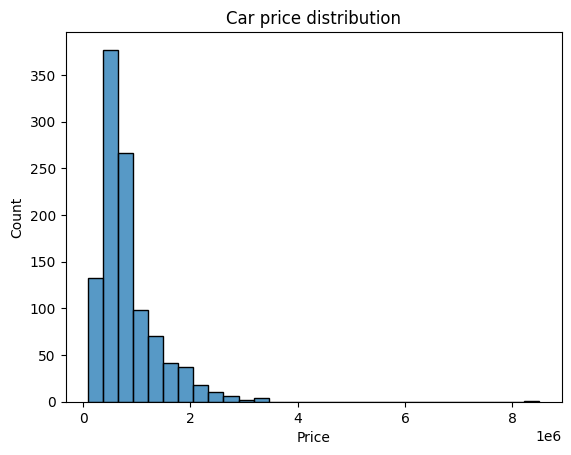

In [55]:
#Price distribution
import seaborn as sns
sns.histplot(x='Price', data=df, bins=30).set_title('Car price distribution')


C:\Users\farne\AppData\Local\Temp\ipykernel_16844\196354263.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation = 90)
C:\Users\farne\AppData\Local\Temp\ipykernel_16844\196354263.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation = 90)
C:\Users\farne\AppData\Local\Temp\ipykernel_16844\196354263.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation = 90)


[Text(0, 0, 'Car Choice Exclusif'),
 Text(1, 0, 'Car&Bike Superstore Pune'),
 Text(2, 0, 'Prestige Autoworld Pvt Ltd'),
 Text(3, 0, 'Star Auto India'),
 Text(4, 0, 'Noida Car Ghar'),
 Text(5, 0, 'Top Gear Cars'),
 Text(6, 0, 'Car Estate'),
 Text(7, 0, 'OM Motors'),
 Text(8, 0, 'Jeen Mata Motors'),
 Text(9, 0, 'Royal Motors (Prop. Auto Carriage Pvt Ltd)')]

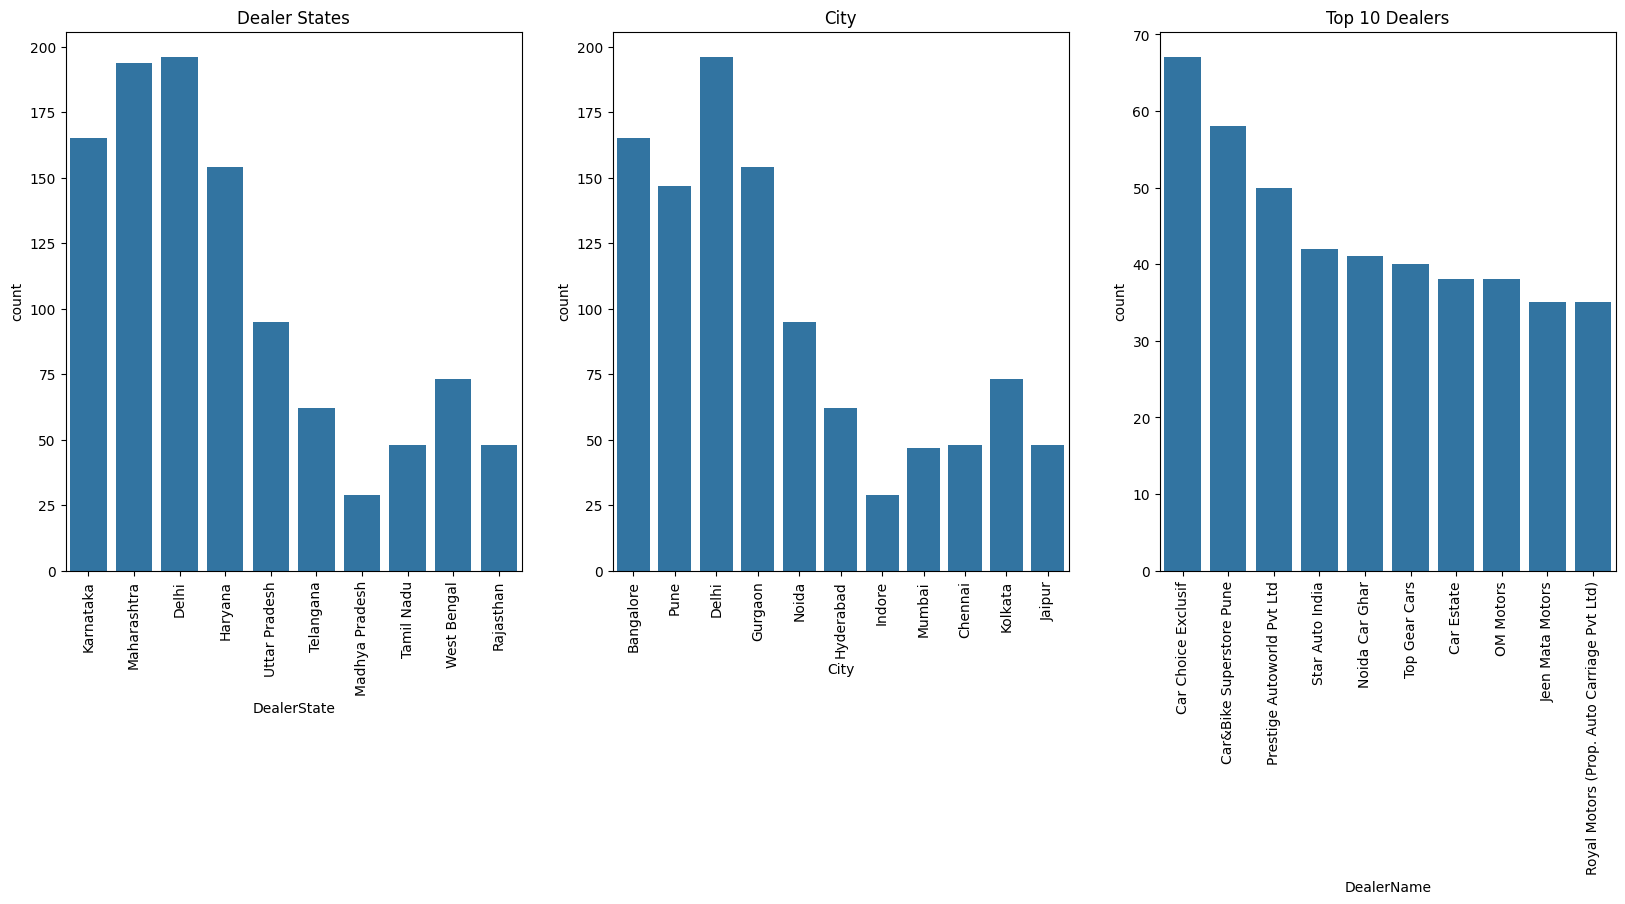

In [56]:
fig, ax = plt.subplots(1,3,figsize=(20,7))

#Dealer State
sns.countplot(x = 'DealerState', data = df, ax = ax[0]).set_title('Dealer States')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation = 90)

#City
sns.countplot(x = 'City', data = df, ax = ax[1]).set_title('City')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation = 90)

#top 10 dealers
sns.countplot(x = 'DealerName', data = df, order = df['DealerName'].value_counts().iloc[:10].index, ax = ax[2]).set_title('Top 10 Dealers')
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation = 90)

Text(0.5, 1.0, 'Number of cars by owner type')

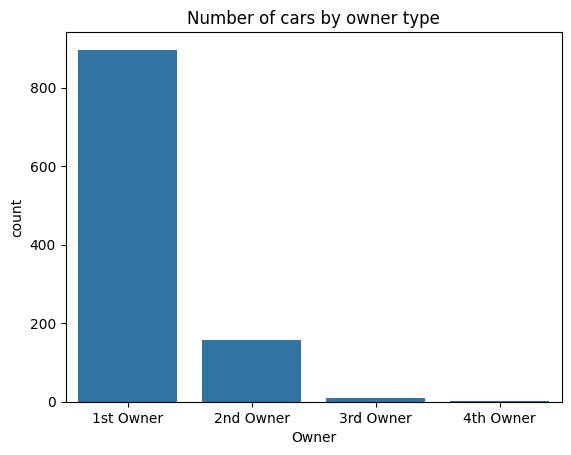

In [57]:
# car Owner type
import seaborn as sns
sns.countplot(x='Owner', data=df).set_title('Number of cars by owner type')

Text(0.5, 1.0, 'numbers of cars by warranty ')

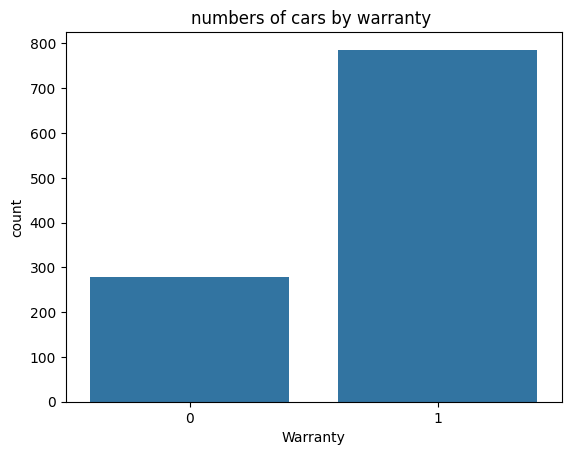

In [59]:
# cars warranty
import seaborn as sns
sns.countplot(x='Warranty', data=df).set_title('numbers of cars by warranty ')

Text(0.5, 1.0, 'Qulaity Score Distribution ')

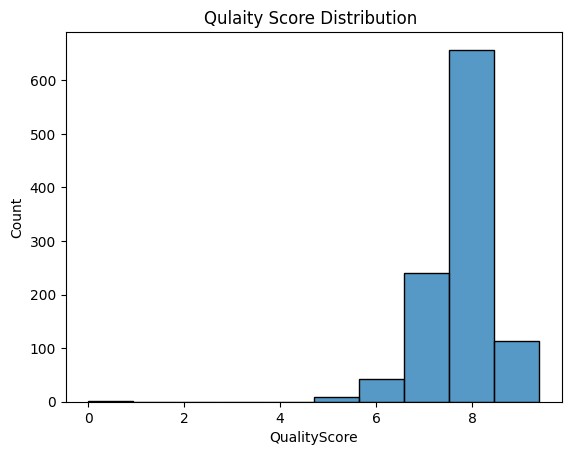

In [60]:
#quality score distribution
import seaborn as sns 
sns.histplot(x='QualityScore', data=df, bins=10).set_title('Qulaity Score Distribution ')

Text(0.5, 1.0, 'Top 10 car Companies by price')

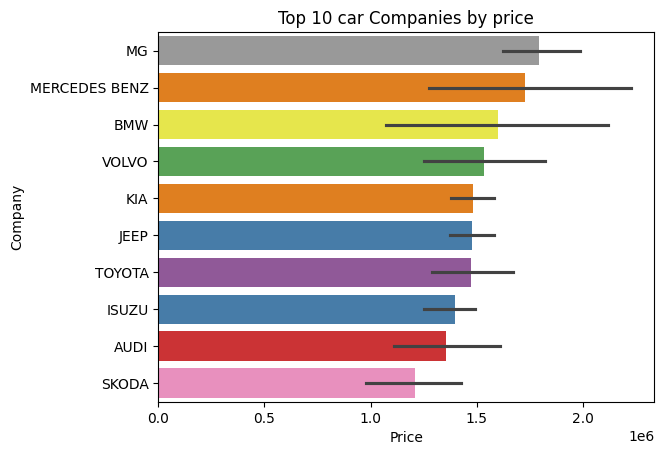

In [61]:
# Top 10 car companies by price are 
import seaborn as sns
sns.barplot(y = 'Company', x = 'Price', data = df, order = df.groupby('Company')['Price'].mean().sort_values(ascending=False).iloc[:10].index, hue = 'Company', palette= 'Set1').set_title('Top 10 car Companies by price')

In [ ]:
This graphs highlights the top 10 car companies in the dataset with
the highest resale value. The MG, Mercedes Benz and BMW are the top 3 car companies with
the highest resale value, since these are luxury car companies. The list also includes Volvo.
followed by KIA, Jeep and Toyota. Surprisingly Audi has much lower resale price has 
compared to the other luxury car companies which might be due to other features.

Moreover, my prevous hypothesis, about the car companies
    -Maruti Suzuki, Hyundai, Honda, Mahindra and Tata, was wrong as they
are not in the top 10 list. This means that these companies cars are in greater
number due to their demand because of low price

Text(0.5, 1.0, 'Top 10 car Models by price')

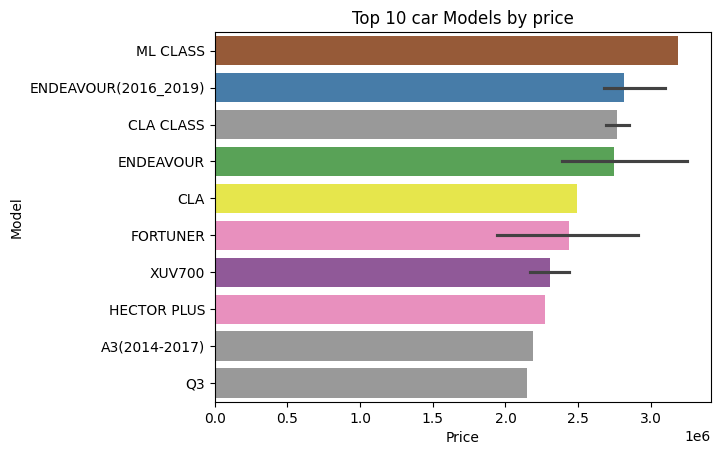

In [63]:
# Top 10 car models by price 
import seaborn as sns
sns.barplot(y = 'Model', x = 'Price', data = df, order = df.groupby('Model')['Price'].mean().sort_values(ascending=False).iloc[:10].index, hue = 'Model', palette= 'Set1').set_title('Top 10 car Models by price')

In [ ]:

This graph shows the relation between the car model 
and it resale value and we can see that it shows similarity with the previous graph.
The car models - ML Class, Endeavour(2016_2019), CLA class are the top three
models with highest resale value, followed by CLA, Fortuner and XUV700. 
Like the previous graph, the audi model A3 is at the 9th position with 
a much lower resale value as compared to the other models.

In the car model also my hypothesis was wrong as I assummed
that Honda City and Swift are the top two car models in the dataset,
followed by Baleno, Creata and EcoSport. Therefore, we came to know
that these car in higher number due to their high demnad because of low price.


In [66]:
# car fuel Type and Price 
import seaborn as sns 
sns.boxplot(x = 'FuelType', y = 'Price', data = df, ax = ax[0], hue = 'FuelType').set_title('Price by Fuel Type')
sns.violinplot(x = 'FuelType', y = 'Price', data = df, ax = ax[1], hue = 'FuelType').set_title('Price by Fuel Type')


Text(0.5, 1.0, 'Price by Fuel Type')

Text(0.5, 1.0, 'Top 10 car Colors by price')

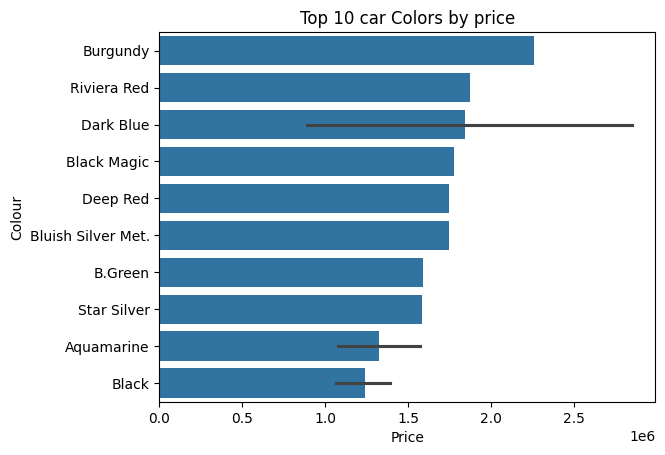

In [68]:
# Top 10 Car Colors by Price 
import seaborn as sns
sns.barplot(y = 'Colour', x = 'Price', data = df, order = df.groupby('Colour')['Price'].mean().sort_values(ascending=False).iloc[:10].index).set_title('Top 10 car Colors by price')

Text(0.5, 1.0, 'Odometer reading and price')

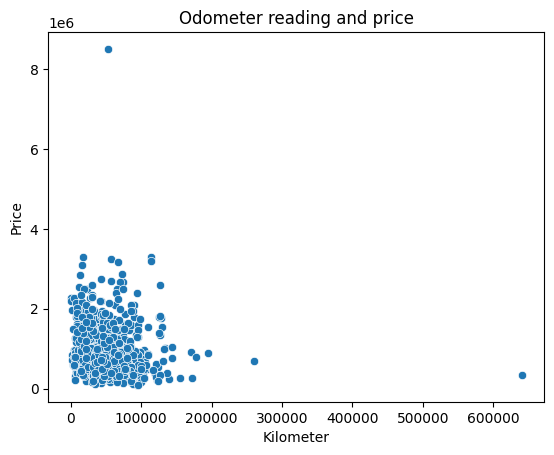

In [69]:
# Odometer reading and Price 
import seaborn as sns
sns.scatterplot(x='Kilometer', y='Price', data =df).set_title('Odometer reading and price')

In [ ]:
In the scatter plot we can see than the data
is concentrated near the origin, which means that most of 
the cars have odometer reading less than 100000 km. In addition 
to that the cars with less odometer reading shows higher resale 
value and as the odometer reading increases the resale value decreases. 


Therefore, my hypothesis was correct that cars with odometer reading less 
than 100000 km are more in demand in the used car market will have a good resale value.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'HATCHBACK'),
  Text(1, 0, 'SEDAN'),
  Text(2, 0, 'MPV'),
  Text(3, 0, 'SUV'),
  Text(4, 0, 'HATCHBACK '),
  Text(5, 0, 'VAN'),
  Text(6, 0, 'MUV'),
  Text(7, 0, 'COMPACTSUV'),
  Text(8, 0, 'Sedan'),
  Text(9, 0, 'SUV ')])

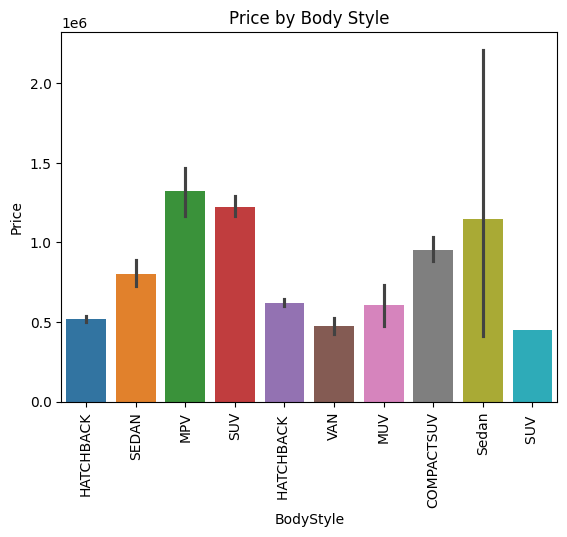

In [71]:
# Body Style and Price 
import seaborn as sns 
sns.barplot(x='BodyStyle', y='Price', data =df, hue='BodyStyle').set_title('Price by Body Style')
plt.xticks(rotation=90)

In [ ]:

MPV, SUV and Sedan are the top 3 car body styles
with the highest resale value. Therefore, we can 
assume that these body styles are more preferred in
the used car market and have a good resale value. This also 
shows that my assumption was correct however, the Hatchback body style 
cars despite being in majority have lower resale value.

Text(0.5, 1.0, 'Car age and price')

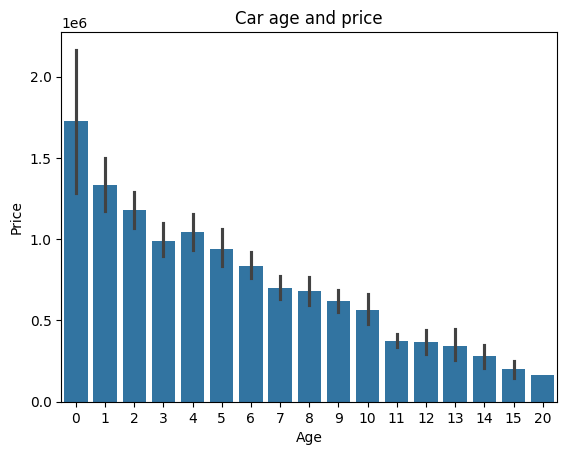

In [72]:
#car age and price 
import seaborn as sns
sns.barplot(x='Age' , y='Price', data =df).set_title('Car age and price')


In [ ]:
As we discussed earlier, age is a key determinant for a 
car's resale value and this graph clearly visulaizes the relation of 
the age with car price. The cars with age less than a 
year has then highest price and as the age increases the prices decreases gradually.

    Therefore, my hypothesis was correct that cars with age less than 5 years have higher resale value.

C:\Users\farne\AppData\Local\Temp\ipykernel_16844\2846793197.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation = 90)
C:\Users\farne\AppData\Local\Temp\ipykernel_16844\2846793197.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation = 90)
C:\Users\farne\AppData\Local\Temp\ipykernel_16844\2846793197.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation = 90)


[Text(0, 0, 'Car Choice Exclusif'),
 Text(1, 0, 'Car&Bike Superstore Pune'),
 Text(2, 0, 'Prestige Autoworld Pvt Ltd'),
 Text(3, 0, 'Star Auto India'),
 Text(4, 0, 'Noida Car Ghar'),
 Text(5, 0, 'Top Gear Cars'),
 Text(6, 0, 'Car Estate'),
 Text(7, 0, 'OM Motors'),
 Text(8, 0, 'Jeen Mata Motors'),
 Text(9, 0, 'Royal Motors (Prop. Auto Carriage Pvt Ltd)')]

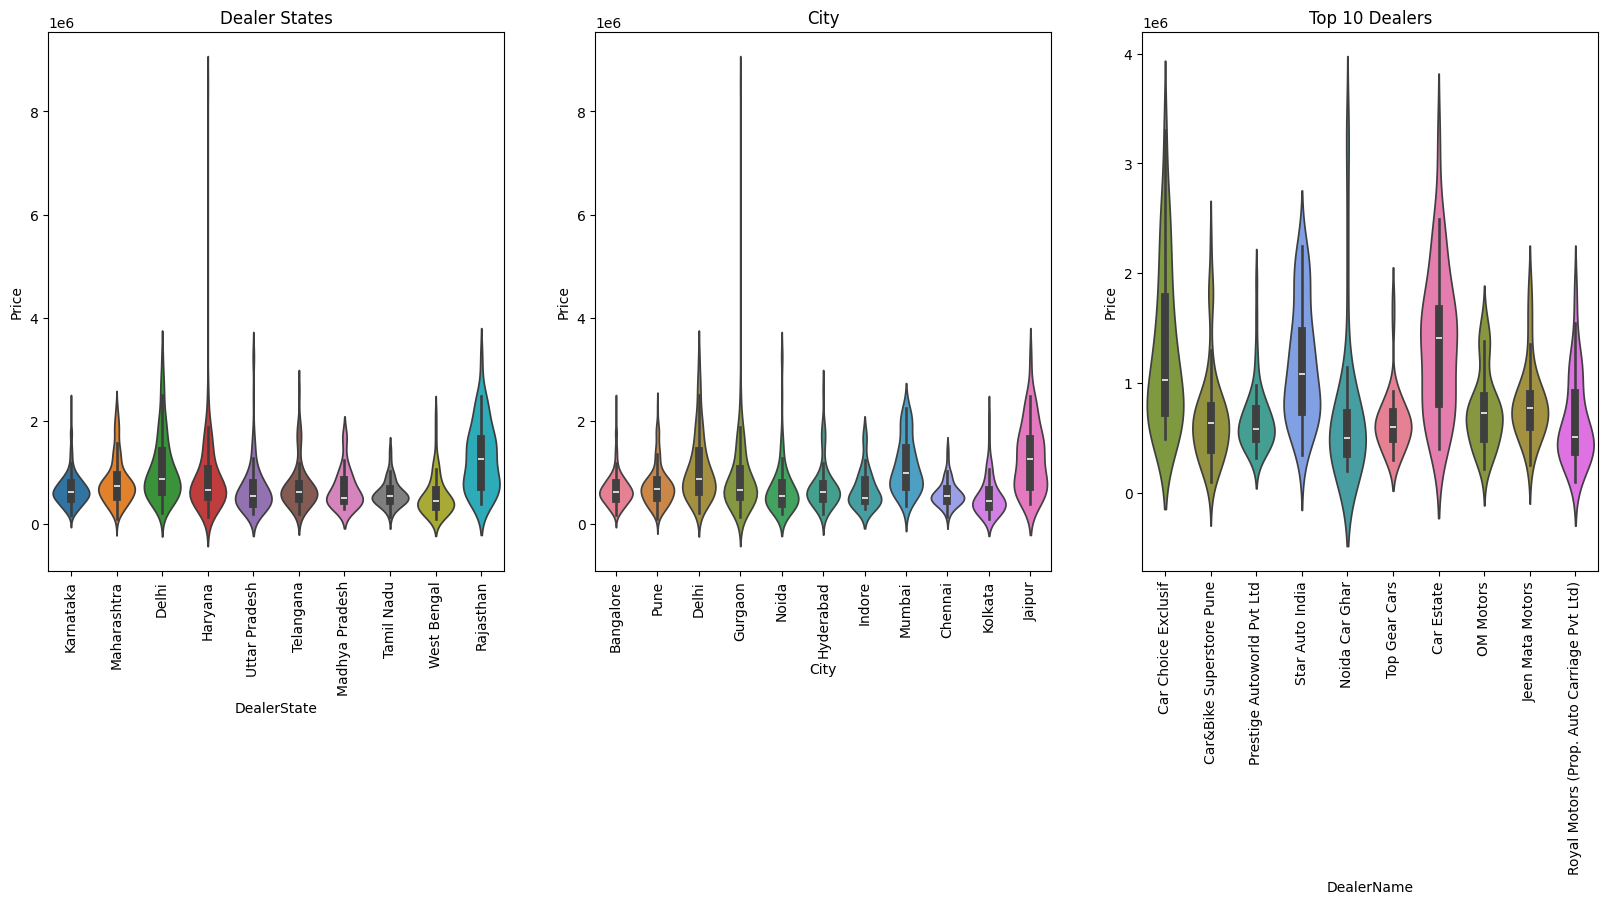

In [73]:
# Location Based Price Distribution 

fig, ax = plt.subplots(1,3,figsize=(20,7))

#Dealer State
sns.violinplot(x = 'DealerState', y = 'Price', data = df, ax = ax[0], hue = 'DealerState').set_title('Dealer States')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation = 90)

#City
sns.violinplot(x = 'City',y = 'Price', data = df, ax = ax[1], hue = 'City').set_title('City')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation = 90)

#top 10 dealers
sns.violinplot(x = 'DealerName',y = 'Price', data = df, order = df['DealerName'].value_counts().iloc[:10].index, ax = ax[2], hue = 'DealerName').set_title('Top 10 Dealers')
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation = 90)

In [ ]:
In the above graph we can see the price distribution based on the state,
city and the dealer name. In the state graph, we can see that the cars in Rajastan 
have the highest price followed by Delhi. Moreover, there are some outliers in 
the graph which os visible from the violinplot where there is strong peak incase of Haryana.

In the city graph, we can see that the cars in Jaipur have the highest price followed 
by Mumbai and Delhi. Moreover, there are some outliers in the graph which os visible
from the violinplot where there is strong peak incase of Gurgaon. In the dealer name graph, 
we can see the top 10 dealers along with their price distribution. Here, Car Estate has the 
highest price followed by Star Auto India and Car Choice. Moreover, there are some outliers 
in the graph which os visible from the violinplot where there is strong peak incase of Noida Car Ghar.

Text(0.5, 1.0, 'Price by owner Type')

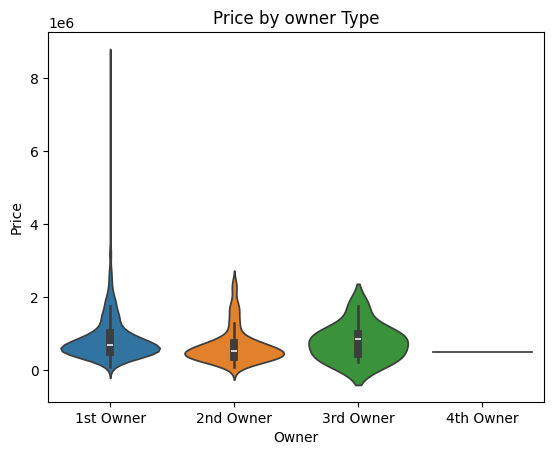

In [75]:
# car owner type and price 
import seaborn as sns
sns.violinplot(x='Owner', y='Price', data=df, hue='Owner').set_title('Price by owner Type')

In [ ]:
The graph shows the price distribution with respect 
to the car owner type. The cars with 1st owner have the highest
price which is obvious as they are new cars. However, the 3rd Owner
type cars depite being less in number have higher price than 2nd Owner type cars,
which is not obvious. 

Therefore, we can assume that 3rd Owner type cars having higher price could some luxury or vintage cars.

Text(0.5, 1.0, 'Price by warranty ')

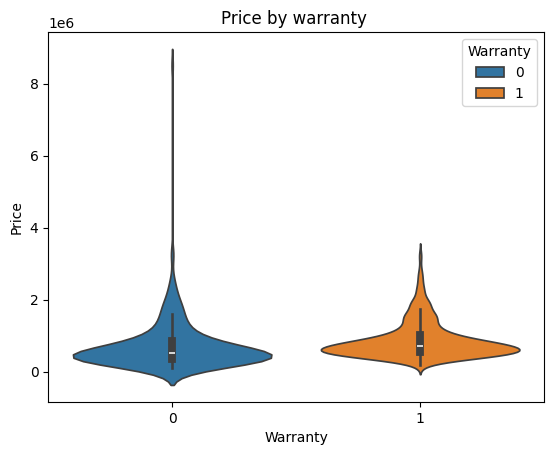

In [77]:
#warranty and Price 
import seaborn as sns
sns.violinplot(x='Warranty', y='Price', data=df, hue='Warranty').set_title('Price by warranty ')

In [ ]:
 we can see some change in the violinplot of the cars with
and without warranty. The cars with warranty tends to have slightly 
higher price than the cars without warranty. 

Therefore, we can assume that cars with warranty are more preferred 
in the used car market and have a good resale value.

Text(0.5, 1.0, 'Quality score and score')

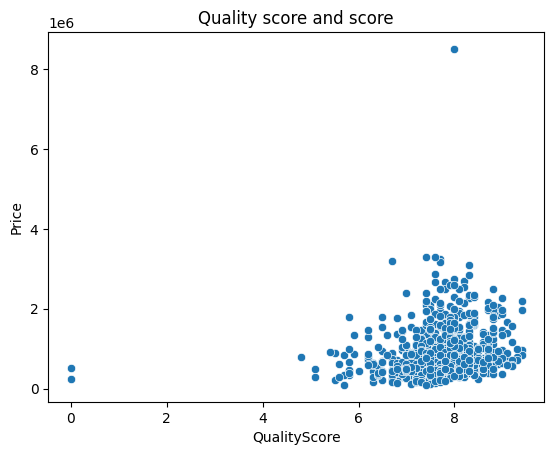

In [78]:
#Quality Score and Score
import seaborn as sns
sns.scatterplot(x='QualityScore', y='Price', data =df).set_title('Quality score and score')

In [ ]:
We can see a very high concentration near the quality score 7 
and above having much higher price than the cars with quality score less than 7.
    
Therefore, we can assume that cars with quality score 7 and above are more
preferred in the used car market and have a good resale value.